<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# TMBD Project - Exploratory Data Analysis

## 0. Loading Data
### 0.1 Let's create and view our dataframe

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast
import datetime 

In [5]:
df = pd.read_csv("TMDB_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 0.2 Looking at the shape of our dataframe

In [6]:
# Provides the count of rows and columns
df.shape

(4803, 20)

### 0.3 Viewing the datatypes present

In [7]:
# Let's look at our data types
df.dtypes

# Lots of columns cast as objects - we will come back to this later

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

## 1. Null handling
### 1.1 Let's explore the distribution of nulls in our data

In [8]:
# Let's look at how the null values are distributed between the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
# Count of null values per column
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### 1.11 Generating a dataframe of null values by column

In [10]:
# Let's put these null values into a dataframe
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe) 
    null_vals = pd.DataFrame(null_vals,columns=['null']) 
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) 
    
    return null_vals.sort_values('percent', ascending=False)

> Citation 1: Function taken from _Digital Futures_ resource _Null Handling_ via _Noodle_.

In [11]:
null_vals(df)

# We can see that homepage and tagline have a high percentage of nulls - let's investigate where these fall in the dataframe

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


#### 1.12 Locating null values by row

In [12]:
# Finding the rows with nulls present using a boolean mask
df[df.isnull().any(axis = 1)]

# 3310 rows with nulls found - too many to drop - let's fill

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""na

### 1.2 Filling nulls
* Null values in the columns of **homepage** and **tagline** exist in a large percentage of the data, **64%** and **18%** respectively.
* This data is assumed to be **MCAR**, and the missing values are not crucial to our analysis.

> With this in mind, we have decided to fill these values with a _flag_.


In [13]:
# Filling homepage
df.homepage.fillna('no link found', inplace = True)

In [14]:
# Filling tagline
df.tagline.fillna('no tagline found', inplace = True)

In [15]:
# Looking again at nulls df
null_vals(df)

# Much better! Now lets zoom in on those few nulls left

,null,percent
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
tagline,0,0.000
status,0,0.000
spoken_languages,0,0.000
revenue,0,0.000


### 1.3 Dropping nulls
* Null values in **overview**, **runtime** and **release_date** exist in a tiny percentage of our data.
* This missing data is also assumed to be **MCAR**.

> With this in mind, we have decided to _drop_ these rows from our data.

In [16]:
df[df.isnull().any(axis = 1)]

# All 4 rows have a significant amount of missing data, and potential errors. Happy to drop these rows.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",no link found,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,no tagline found,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",no link found,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,no tagline found,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",no link found,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,no tagline found,Food Chains,7.4,8
4553,0,[],no link found,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,no tagline found,America Is Still the Place,0.0,0


In [17]:
# Dropping remaining nulls
df.dropna(
    axis = 0,
    how = 'any', 
    subset = ['overview', 'runtime', 'release_date'],  
    inplace = True
)

In [18]:
# All clear!
null_vals(df)

,null,percent
budget,0,0.0
genres,0,0.0
vote_average,0,0.0
title,0,0.0
tagline,0,0.0
status,0,0.0
spoken_languages,0,0.0
runtime,0,0.0
revenue,0,0.0
release_date,0,0.0


## 2. Data Types
### 2.1 Let's look at the release_date column

In [19]:
# Changing the datatype from object to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [20]:
# Checking change has been applied
df.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

### 2.2 Let's look at the nested columns

#### 2.21 Making a fuctions to extract all the genre names

In [21]:
def extract_genres(movie):
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## Making sure the data is taken as a list
    
    genres = [x['name'] for x in movie] ## Get a list of all names using a list comprehension
    
    return ", ".join(genres) ## Join them all together as a string


 
> Citation 2: Function supplied by _Alex Cain_ via _Digital Futures Discord_

In [22]:
# Using the function on the genres column only
df['genres_list'] = df['genres'].apply(extract_genres)

# Checking outcome
df['genres_list']

0       Action, Adventure, Fantasy, Science Fiction
1                        Adventure, Fantasy, Action
2                          Action, Adventure, Crime
3                    Action, Crime, Drama, Thriller
4                Action, Adventure, Science Fiction
                           ...                     
4798                        Action, Crime, Thriller
4799                                Comedy, Romance
4800               Comedy, Drama, Romance, TV Movie
4801                                               
4802                                    Documentary
Name: genres_list, Length: 4799, dtype: object

#### 2.22 Applying the function to all nested columns

In [23]:
# Lets repeat the process for keywords, production_companies, production_countries and spoken_languages
# Same function applicable for all
df['keywords_list'] = df['keywords'].apply(extract_genres)
df['production_companies_list'] = df['production_companies'].apply(extract_genres)
df['production_countries_list'] = df['production_countries'].apply(extract_genres)
df['languages_list'] = df['spoken_languages'].apply(extract_genres)

In [24]:
# Checking columns
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_list,keywords_list,production_companies_list,production_countries_list,languages_list
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English


## 3. Cleaning done, onto some exploration! Finding some aggregate insights
### 3.1 Making a copy dataframe to work from

In [25]:
# Only taking columns we are interested in
ratings = df[['budget', 'genres_list', 'id', 'keywords_list', 'original_language', 'original_title', 'popularity', 'production_countries_list', 'production_companies_list', 'release_date', 'revenue', 'runtime', 'title', 'vote_average', 'vote_count']].copy()

In [26]:
# Dropping any duplicates in the data
ratings.drop_duplicates(keep = 'last', inplace = True)

In [27]:
# Viewing our new dataframe
ratings.shape
ratings.head()

,budget,genres_list,id,keywords_list,original_language,original_title,popularity,production_countries_list,production_companies_list,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,150.437577,"United States of America, United Kingdom","Ingenious Film Partners, Twentieth Century Fox...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,139.082615,United States of America,"Walt Disney Pictures, Jerry Bruckheimer Films,...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,107.376788,"United Kingdom, United States of America","Columbia Pictures, Danjaq, B24",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,112.312950,United States of America,"Legendary Pictures, Warner Bros., DC Entertain...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,43.926995,United States of America,Walt Disney Pictures,2012-03-07,284139100,132.0,John Carter,6.1,2124


### 3.2 Top 10 primary genres by average revenue
#### 3.21 Making a function to get the primary genres

In [28]:
def first_gen(movie):
    ''' function to get first genre out of a list'''
    movie = movie.split(', ') # Splitting into elements of list via commas
    movie = movie[0].split('(') # Splitting bracket from first element
    return movie[0] # Extracting first element only

# Creating new column to hold primary genres
ratings['first_genre'] = ratings['genres_list'].apply(first_gen) 

#### 3.22 Getting aggregate of mean revenue by primary genre

In [29]:
revenue_genre = ratings.copy()\
                    .groupby('first_genre')[['revenue']]\
                    .mean()\
                    .sort_values(['revenue'], ascending = False)\
                    .head(10)\
                    .reset_index(drop = False) 
revenue_genre

,first_genre,revenue
0,Animation,2.417656e+08
1,Adventure,2.109611e+08
2,Science Fiction,1.685224e+08
3,Family,1.594183e+08
4,Fantasy,1.475592e+08
5,Action,1.218614e+08
6,History,7.277602e+07
7,Mystery,6.928847e+07
8,Romance,6.575061e+07
9,War,6.471706e+07


#### 3.23 Visualising the data

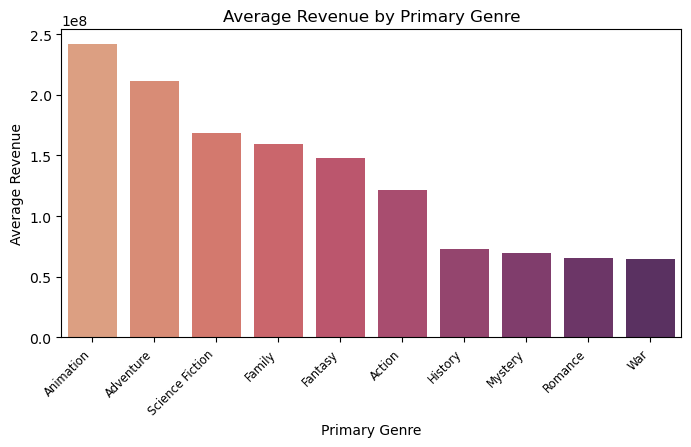

In [46]:
plt.figure(figsize = (8,4)) 

sns.barplot( data = revenue_genre, # selecting data
             x = 'first_genre',
             y = 'revenue',
             palette = 'flare',
           )

plt.xticks(rotation = 45, # rotating labels
            horizontalalignment = 'right', # aligning them with the bars
            fontweight = 'light',
            fontsize = 'small' # setting the fonts
           )

plt.xlabel('Primary Genre')
plt.ylabel('Average Revenue') # renaming labels

plt.title('Average Revenue by Primary Genre') # naming the plot

plt.savefig('Average_revenue_by_primary_genre', dpi = 300, bbox_inches = 'tight')

Here we can see that the primary genre of **Animation** has generated the most revenue on average, followed by **Adventure** and **Science Fiction**.

### 3.3 Average revenue by budget

#### 3.31 Looking at distribution of movie budgets

In [31]:
ratings.budget.agg(['min', 'max', 'mean'])

# We can see the budgets range from 0 - 3.8 1e8

min     0.000000e+00
max     3.800000e+08
mean    2.906593e+07
Name: budget, dtype: float64

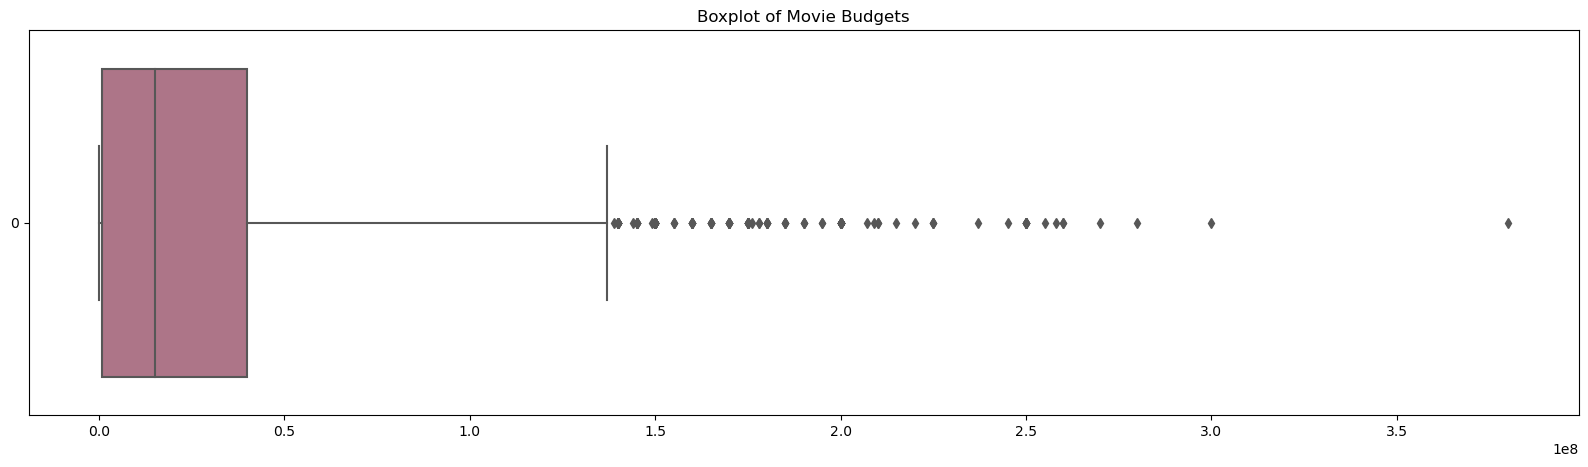

In [32]:
# Creating a boxplot of budget distribution
plt.figure(figsize = (20,5))
sns.boxplot(data = ratings['budget'],
            orient = 'h',  # showing the plot horizontally
            whis = 2.5,  # whisker range is 1.5*IQR by default -- we've changed it to make it more permissive
            color = '#b66c85')
plt.title('Boxplot of Movie Budgets') 
plt.show()

## This plot shows many outliers grouped together - a histogram may be more appropriate

We can see from this boxplot that most of the data is spread from **0.0 - 2.6 1e8**, with further outliers beyond this
> Let's look at a histogram of the data to get a better view

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


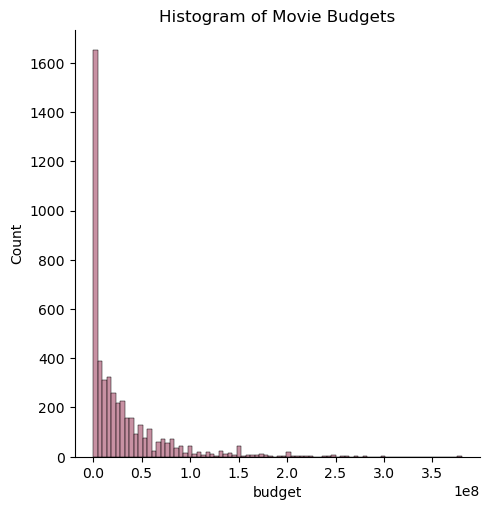

In [33]:
# Creating a histogram of budget distribution
sns.displot(data = ratings['budget'],
            height = 5,
            color = '#b66c85')

plt.title('Histogram of Movie Budgets') 
plt.show()

> Now looking past the initial curve, to the pattern below

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


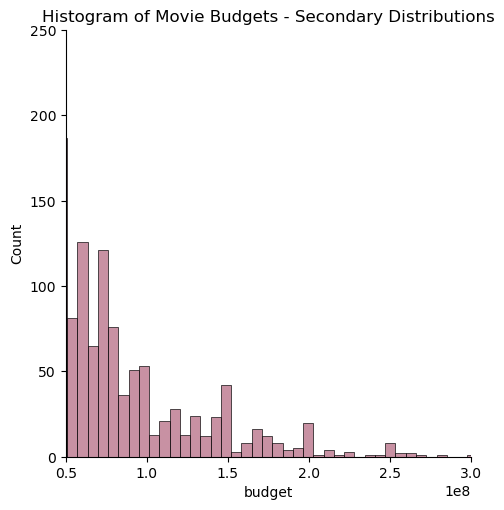

In [34]:
sns.displot(data = ratings['budget'],
            height = 5,
            bins = 60,
            color = '#b66c85') # we can change the bin size

plt.xlim(50000000, 300000000) # zooming in on secondary distributions
plt.ylim(0, 250)

plt.title('Histogram of Movie Budgets - Secondary Distributions') 
plt.show()

Here we can see a handful of secondary distributions
* **0.5 - 1.0 1e8**
* **1.0 - 1.5 1e8**
* **1.5 - 2.0 1e8**
> We will use these ranges as buckets to investigate further

#### 3.32 Making a function to split budget distribution into bins

In [35]:
def budget_grouping(x): # making a grouping function
    if x < 0.5*1e8:
        return '0.0-0.5'
    elif x< 1.0*1e8:
        return '0.5-1.0'
    elif x< 1.5*1e8:
        return '1.0-1.5'
    elif x< 2.0*1e8:
        return '1.5-2.0'
    elif x< 2.5*1e8:
        return '2.0-2.5'
    else:
        return '> 2.5'

ratings['budget_group'] = ratings['budget'].apply(budget_grouping) # creating a new column to hold buckets

#### 3.33 Plotting the budget groups against average revenue

In [36]:
# Creating new dataframe for aggregates
br = ratings.copy()\
        .groupby('budget_group')[['revenue']]\
        .mean()\
        .sort_values(['revenue'], ascending = False)\
        .reset_index(drop = False)
br

,budget_group,revenue
0,> 2.5,8.367590e+08
1,2.0-2.5,8.011709e+08
2,1.5-2.0,4.987059e+08
3,1.0-1.5,3.277984e+08
4,0.5-1.0,1.610537e+08
5,0.0-0.5,3.748408e+07


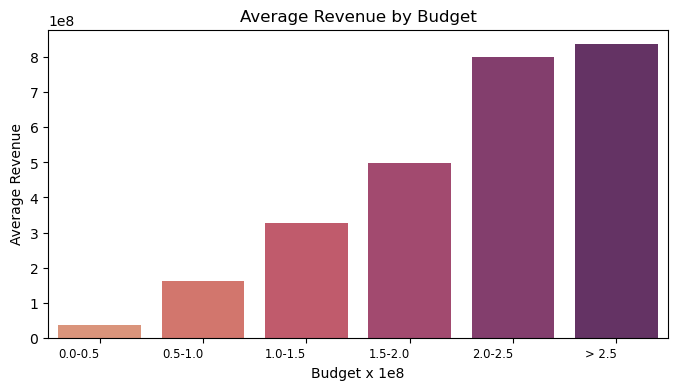

In [47]:
# Plotting from new dataframe
plt.figure(figsize = (8,4)) 

sns.barplot( data = br,
             x = 'budget_group',
             y = 'revenue',
             palette = 'flare',
             order = ['0.0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '> 2.5']
           )

plt.xticks(rotation = 0, # rotating labels
            horizontalalignment = 'right', # aligning them with the bars
            fontweight = 'light',
            fontsize = 'small' # setting the fonts
           )

plt.xlabel('Budget x 1e8')
plt.ylabel('Average Revenue') # renaming labels

plt.title('Average Revenue by Budget') # naming the plot

plt.savefig('Average_revenue_by_budget', dpi = 300, bbox_inches = 'tight')

Here we can see a clear **correlation** between film budget and revenue.
> Let's look into this further!

## 4. Looking at correlations in the data
### 4.1 Heatmap of all numeric columns

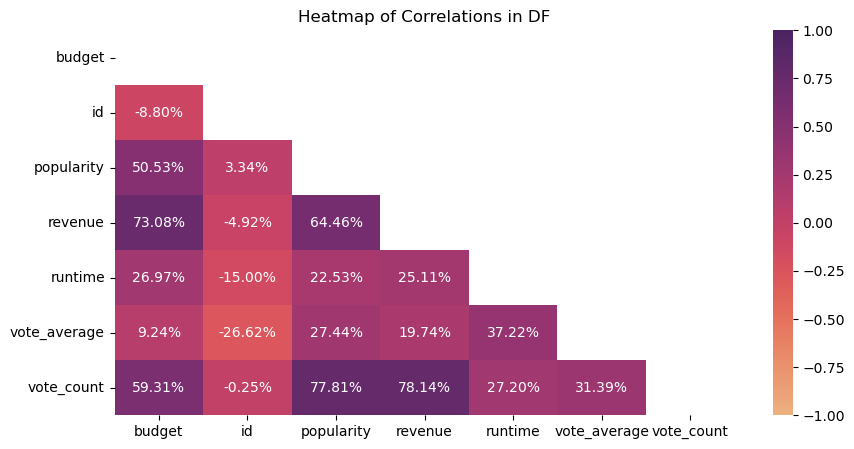

In [48]:
plt.figure(figsize = (10,5))
sns.heatmap(ratings.corr(numeric_only = True),
               annot = True, # adding annotations
               cmap = 'flare',
               vmin =-1, # fixing the axis
               vmax =1,
               fmt = '.2%', # converting numbers to percentages and specifying the d.p. limit
               mask = np.triu(df.corr(numeric_only = True))) # applying triangular mask to get rid of reflected outcomes
plt.title('Heatmap of Correlations in DF') 
plt.savefig('Correlation_heatmap', dpi = 300, bbox_inches = 'tight')

### Here we can see a correlation of **73.08%** between budget and revenue
Other correlations include
* vote_count and revenue at **78.14%** 
* vote_count and popularity at **77.81%** 

The latter two can be explained by the following
_The higher the number of votes given, the higher the number of users to access the film. This translates to a higher revenue and popularity._

> We will focus on the relationship between budget and revenue.


### 4.2 Pairplot of budget vs. revenue

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


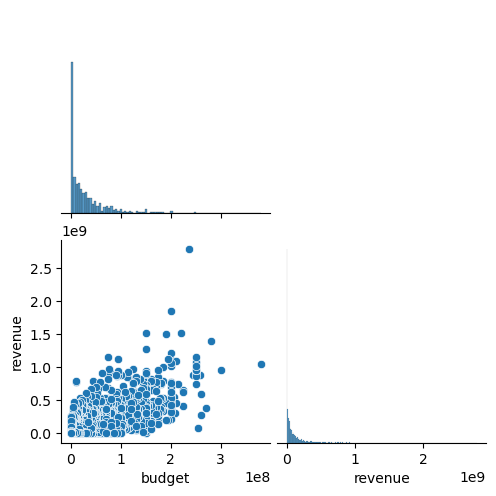

In [39]:
sns.pairplot(data = ratings[['budget', 'revenue']], 
             corner = True)
plt.show()

Here we can see the positive correlation between budget and revenue more clearly.

This pairplot shows a large spread in the data, with results varying more widely at the **higher end** of both axis.
> Past a certain budget, we have _diminishing returns_ on the revenue

### 4.3 Does this correlation translate to our top 10 films by budget and revenue?
#### 4.31 Making dataframe for top 10 films by budget  

In [40]:
top_10_bud = ratings[['budget', 'title']]\
    .copy()\
    .sort_values(['budget', 'title'], ascending = [False, True])\
    .head(10)\
    .reset_index(drop = False) 

# make it pretty
top_10_bud['Rank'] = top_10_bud.index + 1
top_10_bud = top_10_bud[['Rank', 'title', 'budget']]

top_10_bud

,Rank,title,budget
0,1,Pirates of the Caribbean: On Stranger Tides,380000000
1,2,Pirates of the Caribbean: At World's End,300000000
2,3,Avengers: Age of Ultron,280000000
3,4,Superman Returns,270000000
4,5,John Carter,260000000
5,6,Tangled,260000000
6,7,Spider-Man 3,258000000
7,8,The Lone Ranger,255000000
8,9,Batman v Superman: Dawn of Justice,250000000
9,10,Captain America: Civil War,250000000


#### 4.32 Making dataframe for top 10 films by revenue

In [41]:
top_10_rev = ratings[['title', 'revenue']]\
    .copy()\
    .sort_values(['revenue', 'title'], ascending = [False, True])\
    .head(10)\
    .reset_index(drop = False) 

# make it pretty
top_10_rev['Rank'] = top_10_rev.index + 1
top_10_rev = top_10_rev[['Rank', 'title', 'revenue']]

top_10_rev

,Rank,title,revenue
0,1,Avatar,2787965087
1,2,Titanic,1845034188
2,3,The Avengers,1519557910
3,4,Jurassic World,1513528810
4,5,Furious 7,1506249360
5,6,Avengers: Age of Ultron,1405403694
6,7,Frozen,1274219009
7,8,Iron Man 3,1215439994
8,9,Minions,1156730962
9,10,Captain America: Civil War,1153304495


#### 4.33 Merging dataframes on title

In [42]:
top_10_bud.merge(top_10_rev, on ='title', how = 'left') 

,Rank_x,title,budget,Rank_y,revenue
0,1,Pirates of the Caribbean: On Stranger Tides,380000000,NaN,NaN
1,2,Pirates of the Caribbean: At World's End,300000000,NaN,NaN
2,3,Avengers: Age of Ultron,280000000,6.0,1.405404e+09
3,4,Superman Returns,270000000,NaN,NaN
4,5,John Carter,260000000,NaN,NaN
5,6,Tangled,260000000,NaN,NaN
6,7,Spider-Man 3,258000000,NaN,NaN
7,8,The Lone Ranger,255000000,NaN,NaN
8,9,Batman v Superman: Dawn of Justice,250000000,NaN,NaN
9,10,Captain America: Civil War,250000000,10.0,1.153304e+09


There are only two instances of overlap in the top 10 films by budget and revenue:
* **'Avengers: Age of Ultron'** and
* **'Captain America: Civil War'**.

This does not appear to be in line with the **73.08%** correlation between these variables.
> Again, we could be seeing _diminishing returns_ on revenue past a certain budget.

## 5. Deepdive - Higher end of Budgets

### 5.1 Average revenue by budget - look deeper

We have already seen a distribution of this type _(see section 3.3)_, but need to look more closely at the top budget films. There is very little overlap between the top 10 scorers, so what do these have in common?
* All have a budget of **<2.5 1e8**, so would exist in the last bin of the graph
> We need to break this bucket down further!


In [43]:
# Making a grouping function
def further_budget_grouping(x):
    if x < 1.0*1e8:
        return '0.0-1.0'
    elif x< 2.0*1e8:
        return '1.0-2.0'
    elif x< 2.3*1e8:
        return '2.0-2.3'
    elif x< 2.5*1e8:
        return '2.3-2.5'
    elif x< 2.6*1e8:
        return '2.5-2.6'
    elif x< 2.7*1e8:
        return '2.6-2.7'
    elif x< 2.8*1e8:
        return '2.7-2.8'
    elif x< 2.9*1e8:
        return '2.8-2.9'
    elif x< 3.0*1e8:
        return '2.9-3.0'
    elif x< 3.1*1e8:
        return '3.0-3.1'
    else:
        return '> 3.1'

ratings['further_budget_group'] = ratings['budget'].apply(further_budget_grouping) # creating new column to hold buckets

# creating dataframe of aggregate information
brf = ratings.copy()\
        .groupby('further_budget_group')[['revenue']]\
        .mean()\
        .sort_values(['revenue'], ascending = False)\
        .reset_index(drop = False)
brf

,further_budget_group,revenue
0,2.3-2.5,1.834320e+09
1,2.8-2.9,1.405404e+09
2,> 3.1,1.045714e+09
3,3.0-3.1,9.610000e+08
4,2.5-2.6,8.709011e+08
5,2.0-2.3,7.299192e+08
6,2.6-2.7,4.379670e+08
7,2.7-2.8,3.910812e+08
8,1.0-2.0,3.885238e+08
9,0.0-1.0,5.599607e+07


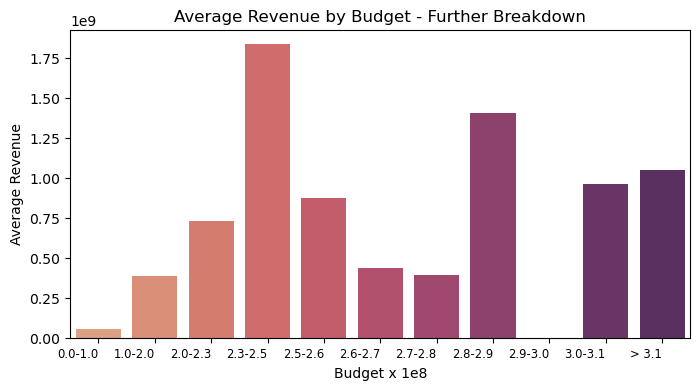

In [49]:
# plotting from aggregate dataframe
plt.figure(figsize = (8,4)) 

sns.barplot( data = brf,
             x = 'further_budget_group',
             y = 'revenue',
             palette = 'flare',
             order = ['0.0-1.0', '1.0-2.0', '2.0-2.3', '2.3-2.5', '2.5-2.6', '2.6-2.7', '2.7-2.8', '2.8-2.9', '2.9-3.0', '3.0-3.1', '> 3.1']
           )

plt.xticks(rotation = 0, # rotating labels
            horizontalalignment = 'right', # aligning them with the bars
            fontweight = 'light',
            fontsize = 'small' # setting the fonts
           )

plt.xlabel('Budget x 1e8')
plt.ylabel('Average Revenue') # renaming labels

plt.title('Average Revenue by Budget - Further Breakdown') # naming the plot

plt.savefig('Average_revenue_by_budget_breakdown', dpi = 300, bbox_inches = 'tight')

Here we can see a clear distribution of the revenue increasing up to a budget of approximately £250,000,000,  after which we see a gradual decrease. There is a secondary increase in revenue as the budget draws near to £300,000,000, but this is less consistent.

> From this data we can draw the insight that the optimum film budget for revenue generation is **£250,000,000** or **£0.25bn**.

### 5.2 Movie comparison at the high end

In [45]:
ratings[(ratings.budget == ratings.budget.max()) | (ratings.revenue == ratings.revenue.max())][['title', 'genres_list', 'budget', 'revenue', 'release_date']]

,title,genres_list,budget,revenue,release_date
0,Avatar,"Action, Adventure, Fantasy, Science Fiction",237000000,2787965087,2009-12-10
17,Pirates of the Caribbean: On Stranger Tides,"Adventure, Action, Fantasy",380000000,1045713802,2011-05-14


##### This table shows us a comparison of the _highest grossing_ film, compared to the film with the _highest budget_. 

> As we can see, the 2009 hit _'Avatar'_ made a whopping **£2.8bn**, with a budget of **£237,000,000**. 

> Meanwhile, _'Pirates of the Caribbean: On Stranger Tides'_ made **£1.0bn**, on a budget of **£380,000,000**.

For the first, the value of the film from budget to revenue grew by a factor of **_over 11x_**. For the last, it grew by **_under 3x_**.
